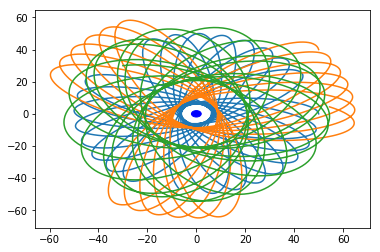

In [2]:
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 20


class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""

    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity

    @staticmethod
    def gravity_dencity(dist: 'float') -> 'float':
        if dist > collision_distance:
            return G / dist ** 1
        else:
            return -G / dist ** 2  # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого

    def force_induced_by_other(self, others: 'list') -> 'numpy.array':
        force = 0
        for other in others:
            if other is self:
                continue
            delta_p = other.position - self.position
            distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
            force_direction = delta_p / distance
            force += force_direction * self.mass * other.mass * MaterialPoint.gravity_dencity(distance)
        return force

    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 40.0]))
point_2 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 50.0]))
point_3 = MaterialPoint(10.0, numpy.array([-30.0, 30.0]), numpy.array([140.0, 24.0]))

points = list()
coordinates = list()


def add_point(point):
    points.append(point)
    coordinates.append(([], []))


add_point(point_1)
add_point(point_2)
add_point(point_3)


def model_step():
    for point in points:
        point.apply_force(point.force_induced_by_other([centrum]))
    for point in points:
        point.advance()


for stepn in range(int(time_to_model / model_delta_t)):
    for i, point in enumerate(points):
        coordinates[i][0].append(point.position[0])
        coordinates[i][1].append(point.position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for coor in coordinates:
    plt.plot(coor[0], coor[1])

plt.show()


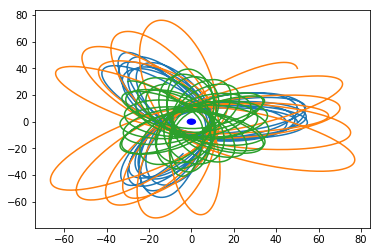

In [16]:
centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 40.0]))
point_2 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 50.0]))
point_3 = MaterialPoint(10.0, numpy.array([-30.0, 30.0]), numpy.array([20.0, 24.0]))

points = list()
coordinates = list()


def add_point(point):
    points.append(point)
    coordinates.append(([], []))


add_point(point_1)
add_point(point_2)
add_point(point_3)


def model_step():
    for point in points:
        point.apply_force(point.force_induced_by_other([centrum] + points))
    for point in points:
        point.advance()


for stepn in range(int(time_to_model / model_delta_t)):
    for i, point in enumerate(points):
        coordinates[i][0].append(point.position[0])
        coordinates[i][1].append(point.position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for coor in coordinates:
    plt.plot(coor[0], coor[1])

plt.show()



### Задание

#### a

Взять код выше и смоделировать ситуацию для двумерного мира (в котором сила тяготения пропорциональна $\frac{1}{R}$) и набора из произвольного количества тел (проверить для трёх, но использовать список). При этом уменьшить количество массивов для хранения точек графиков (использовать `массив.copy()`, чтобы не терять значения).

#### b

Посмотреть, как изменится картина, когда тела начнут притягивать друг друга.